# Modelo diferenciador de imágenes de cáncer de piel y otro tipo de lesiones cutáneas

## Origen de los datos

---
* Para el modelo de imágenes de piel con cáncer y piel con otras lesiones, hemos hecho una combinación de cuatro datasets distintos conjuntos de imágenes: uno que contenía imagenes de pieles con cáncer y otro que contenía otro tipo de lesiones. Los dos han sido obtenidos de Kaggle:

  * Imágenes de piel con cancer:
      * https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign?select=train
      * https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
      *  https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
      *  https://www.kaggle.com/datasets/yashjaiswal4559/skin-disease
      *  Aun que este último dataset tiene imagenes tanto de cáncer como de otras lesiones que no son cáncer, para el apartado de cáncer hemos cogido las que son cancer sólo: melanoma y carcinomas basales. (Ya que las imagenes están etiquetasdas por carpetas según su clase).

  * Imágenes de piel con otro tipo de lesiones:
      * https://www.kaggle.com/datasets/yashjaiswal4559/skin-disease
      * Aunque este último dataset tiene imagenes tanto de cáncer como de otras lesiones que no son cáncer, para el apartado de "otras lesiones" hemos cogido las que no son cancer como dermnatitis, hongos, etc.. (Ya que las imagenes están etiquetasdas por carpetas según su clase).

## Instalación de recursos e importación de librerías

---

* Realizamos todas las instalaciones necesarias para la elaboración de nuestros modelos.

In [4]:
pip install imblearn==0.0

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install efficientnet

  Using cached efficientnet-1.1.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl.metadata (1.7 kB)
  Using cached scikit_image-0.22.0-cp39-cp39-win_amd64.whl.metadata (13 kB)
  Using cached imageio-2.34.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached tifffile-2024.2.12-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl.metadata (4.3 kB)
Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
Using cached scikit_image-0.22.0-cp39-cp39-win_amd64.whl (24.5 MB)
Using cached imageio-2.34.0-py3-none-any.whl (313 kB)
Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
Using cached tifffile-2024.2.12-py3-none-any.whl (224 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


* Importacion de librerías

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import zipfile
import keras
import scipy
import os
import torchvision.transforms as transforms

from PIL import Image
from collections import Counter
from torchvision.datasets import ImageFolder
from tensorflow.python.client import device_lib
from efficientnet.tfkeras import EfficientNetB0, preprocess_input

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, VGG19, NASNetLarge, NASNetMobile, Xception

from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import load_model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, Callback
from keras.applications import InceptionV3

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

%matplotlib inline

## Extracción de los datos

---

* Procedemos a la extraccíón de los datos:

  * Especificamos la ruta del origen de los datos y la ruta del destino donde los datos son extraidos y descomprimidos.
  * Listamos las carpetas extraidas y las imprimimos.
  * Creamos la variable `train_dir` que contiene las carpetas con las imágenes correspondientes a las dos clases principales con las que vamos a trabajar nuestros modelos: `piel_sana` y `piel_cancer`.


In [13]:
# Ruta del archivo ZIP en Google Drive
ruta_archivo_zip = 'C:/Users/admin2/Desktop/dermascan_colabs/zips/cancer_y_otros.zip'

# Ruta donde deseas extraer los archivos
ruta_destino = 'C:/Users/admin2/Desktop/dermascan_colabs/unzips/'

# Descomprime el contenido del ZIP
with zipfile.ZipFile(ruta_archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(ruta_destino)

# Lista los archivos extraídos
archivos_extraidos = os.listdir(ruta_destino)
print(f'Archivos extraídos: {archivos_extraidos}')

# Ruta de la carpeta que contiene las imágenes
train_dir = os.path.join(ruta_destino, 'cancer_y_otros')


# Verifica la existencia de la carpeta antes de listar los archivos
if os.path.exists(train_dir):
    archivos_en_carpeta = os.listdir(train_dir)
    print(f'Archivos en la carpeta: {archivos_en_carpeta}')
else:
    print(f'La carpeta {train_dir} no existe.')

# Lista de nombres de archivos en la carpeta
cancer_y_otros = os.listdir(train_dir)

Archivos extraídos: ['cancer_y_otros', 'objeto_o_piel', 'sana_vs_cancer']
Archivos en la carpeta: ['cancer', 'otras_lesiones']


## Muestreo y Visualización de los datos

---

### Contenido del dataset

In [14]:
# Numero de imagenes para cada clase
nums_train = {}
nums_val = {}
for s in cancer_y_otros:
    nums_train[s] = len(os.listdir(train_dir + '/' + s))
img_per_class_train = pd.DataFrame(nums_train.values(), index=nums_train.keys(), columns=["no. of images"])
print('Train data distribution :')
img_per_class_train

Train data distribution :


no. of images
cancer                   9999
otras_lesiones          10000

### Distribución de los datos

* Creamos una grásfica de barras para representar la distribución de las imágenes del dataset ssegún su clase.

<Axes: title={'center': 'Dsitribución de las imágenes'}, xlabel='Tipo de imagen', ylabel='Número de imágenes'>

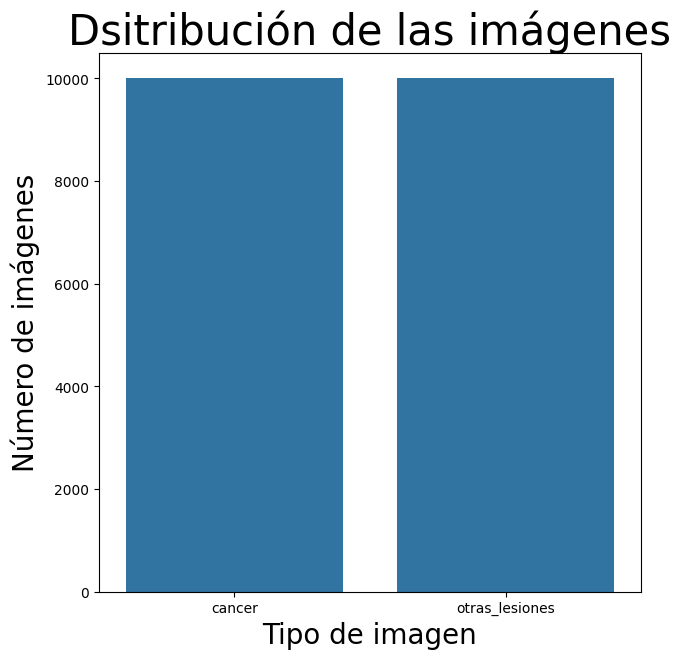

In [15]:
plt.figure(figsize=(7,7))
plt.title('Dsitribución de las imágenes',fontsize=30)
plt.ylabel('Número de imágenes',fontsize=20)
plt.xlabel('Tipo de imagen',fontsize=20)

keys = list(nums_train.keys())
vals = list(nums_train.values())
sns.barplot(x=keys, y=vals)

### Visualización

* Función para visualizar los datos

In [16]:
# Funcion para mostrar imagénes
train = ImageFolder(train_dir, transform=transforms.ToTensor())
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    return image.permute(1, 2, 0)

* Muestra de imágenes de cáncer de piel malingno

Label :cancer(0)
Label :cancer(0)
Label :cancer(0)
Label :cancer(0)
Label :cancer(0)
Label :cancer(0)


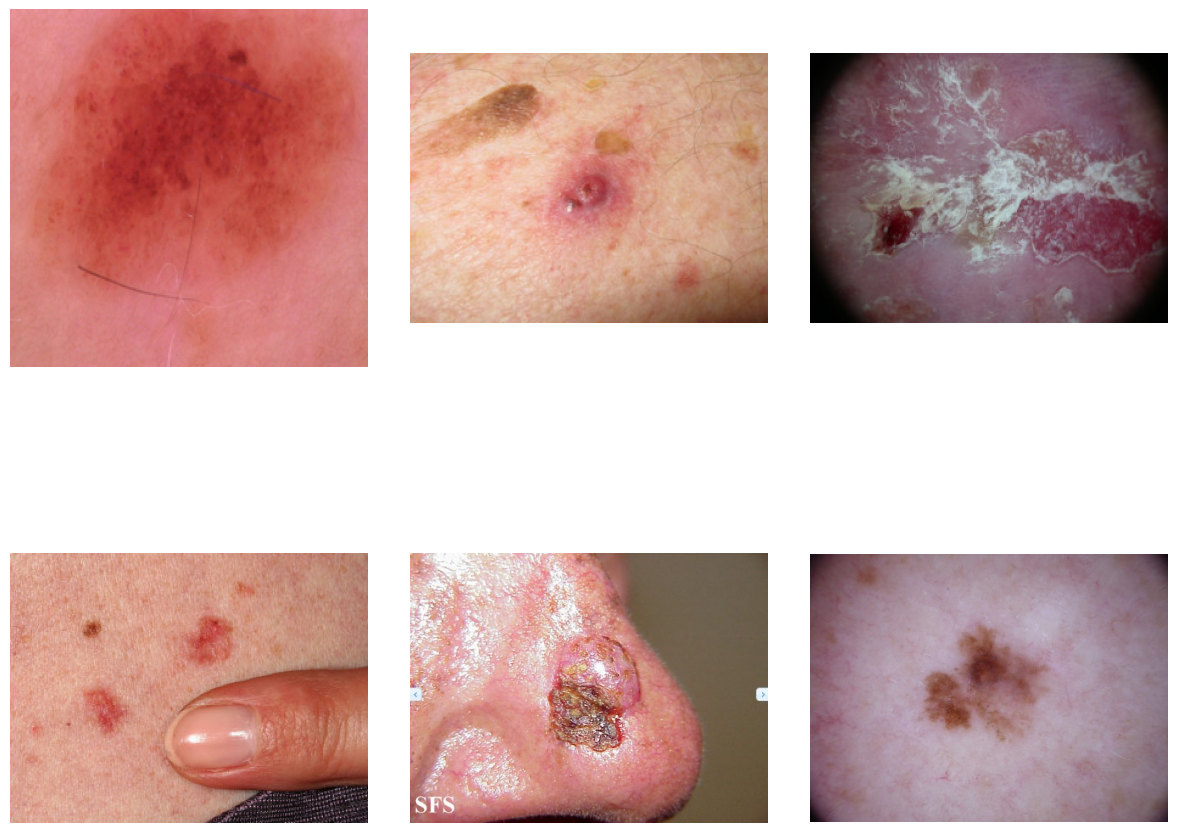

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
fig.tight_layout(pad=0)

images_indices = [1000, 1050, 1150, 1250, 1333, 1400]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(show_image(*train[images_indices[i]]))
    ax.axis('off')

plt.show()

* Muestra de imágenes de otras lesiones

Label :otras_lesiones(1)
Label :otras_lesiones(1)
Label :otras_lesiones(1)
Label :otras_lesiones(1)
Label :otras_lesiones(1)
Label :otras_lesiones(1)


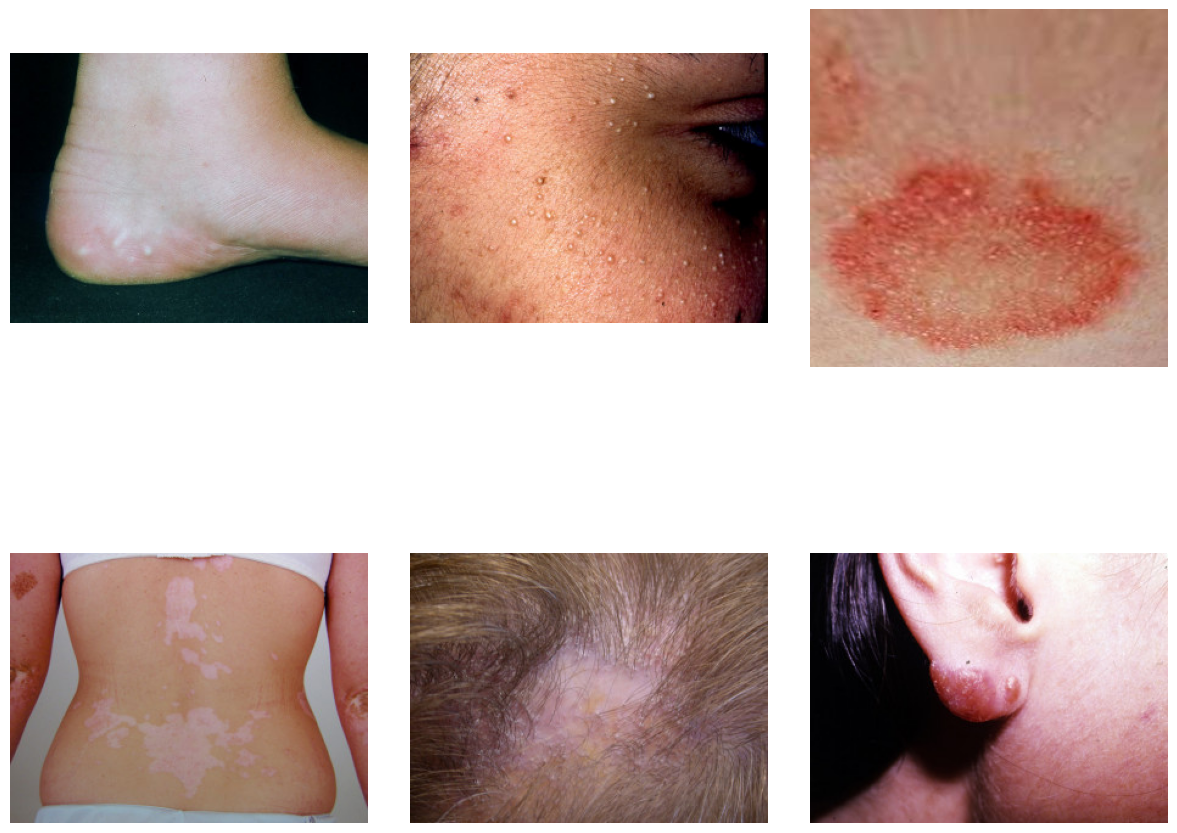

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
fig.tight_layout(pad=0)

images_indices = [11300, 12400, 14035, 14013, 10500, 16740]

for i, ax in enumerate(axs.flatten()):
    ax.imshow(show_image(*train[images_indices[i]]))
    ax.axis('off')

plt.show()

## Preparación y tratamiento de datos

### Trasformación: redimensionado de imágenes

---

En este bloque de código, realizamos el proceso de transformación de nuestros datos aplicando un redimensionado de las imágenes que van a ser utilizadas en nuestros modelos posteriormente.


* Creamos la función `redimensionar_imagen`:

  * Esta función toma como entrada la ruta de una imagen y el nuevo tamaño deseado. Luego, abre la imagen, la redimensiona al nuevo tamaño especificado y la convierte en un array.

* El *tamaño* deseado para todas las imágenes se define como (150, 150).

* Redimensionamiento de las imágenes de entrenamiento: tanto para la clase "cancer" como para la clase "otras_lesiones" utilizamos la función *redimensionar_imagen*.

* Nos aseguramos que todas las imágenes tengan el mismo tamaño:

  * Realizamos una comprobación con un blucle `for` para asegurarnos de que todas las imágenes tengan el tamaño correcto (150, 150, 3).

* Se concatenan los datos de ambas clases (piel y objeto) en un solo conjunto de datos.

* Creamos las etiquetas correspondientes:
  * Las imágenes de la clase "cancer" se etiquetan como 0.
  * Las imágenes de la clase "otras_lesiones" se etiquetan como 1.

In [19]:
def redimensionar_imagen(ruta, nuevo_tamano):
    imagen = Image.open(ruta)
    imagen_redimensionada = imagen.resize(nuevo_tamano)
    arreglo_pixeles_redimensionado = np.array(imagen_redimensionada)
    return arreglo_pixeles_redimensionado

# Definir el nuevo tamaño deseado
tamano=150
nuevo_tamano = (tamano, tamano)

# Redimensionar las imágenes de entrenamiento benignasNM
datos_train_cancer_redimensionados = [redimensionar_imagen(os.path.join(train_dir, 'cancer', nombre_imagen), nuevo_tamano) for nombre_imagen in os.listdir(os.path.join(train_dir, 'cancer'))]

# Redimensionar las imágenes de entrenamiento malignas
datos_train_otras_lesiones_redimensionados = [redimensionar_imagen(os.path.join(train_dir, 'otras_lesiones', nombre_imagen), nuevo_tamano) for nombre_imagen in os.listdir(os.path.join(train_dir, 'otras_lesiones'))]

# Asegurarse de que todas las imágenes tengan el mismo tamaño
datos_train_cancer_redimensionados = np.array([img for img in datos_train_cancer_redimensionados if img.shape == (tamano, tamano, 3)])
datos_train_otras_lesiones_redimensionados = np.array([img for img in datos_train_otras_lesiones_redimensionados if img.shape == (tamano, tamano, 3)])

# Concatenar los datos de ambas clases
datos_train_redimensionados = np.concatenate([datos_train_cancer_redimensionados, datos_train_otras_lesiones_redimensionados], axis=0)

# Crear etiquetas correspondientes
etiquetas_train_redimensionadas = np.concatenate([np.zeros(len(datos_train_cancer_redimensionados)), np.ones(len(datos_train_otras_lesiones_redimensionados))], axis=0)



* Este proceso es esencial para preparar los datos de las imágenes antes de alimentar a un modelo de ML para su entrenamiento.

* El proceso de redimensionado asegura que todas las imágenes tengan el mismo tamaño, lo que facilita el procesamiento por parte del modelo.

* La creación de etiquetas tambíen es crucial para el entrenamiento supervisado del modelo, ya que le proporciona la información necesaria sobre las clases a predecir.

### Data splitting: Conjunto de entrenamiento y test

---

Este fragmento de código se encarga de preparar los datos  y dividirlos en conjuntos de entrenamiento y test, tambíen realiza una normalización de los píxeles de las imágenes y convierte las etiquetas en formato one-hot encoding.

* **División de los datos en conjuntos de entrenamiento y test**:
  * Se utiliza la función `train_test_split` de *scikit-learn* para dividir los datos de imágenes (datos_train_redimensionados) y etiquetas (etiquetas_train_redimensionadas) en dos conjuntos separados: uno para entrenamiento (`X_train, y_train`) y otro para prueba (`X_test, y_test`).
  * Con el parámetro `test_size=0.2` indicamos que el 20% de los datos se utilizarán para el conjunto de prueba, mientras que el 80% se utilizará para el conjunto de entrenamiento.
  * Con el parámetro `random_state=42` aseguramos la reproducibilidad al fijar la semilla aleatoria.
    

* **Normalización de los píxeles:** las intensidades de los píxeles de las imágenes se normalizan dividiendo cada valor de píxel por 255.
  * Este proceso asegura que todas las características estén en una escala similar, lo que puede mejorar la convergencia del modelo durante el entrenamiento. Las imágenes se convierten a tipo de datos float32 antes de la normalización para permitir la división por un número decimal.

* **Conversión de etiquetas a formato one-hot**:
  * Las etiquetas (*y_train / y_test*) se convierten en formato one-hot utilizando la función `to_categorical` de Keras.
  * Esto consiste en  que cada etiqueta se representa como un vector binario donde un único valor es 1 y el resto son 0. Por ejemplo, si hay dos clases (como en este caso), la clase 0 se representará como [1, 0] y la clase 1 como [0, 1].
  * Es útil ya que proporciona una representación más adecuada de las etiquetas para el modelo de aprendizaje automático.

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos_train_redimensionados, etiquetas_train_redimensionadas, test_size=0.2, random_state=42)


# Normalizar los píxeles dividiendo por 255
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir etiquetas a formato one-hot
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

* Vemos la estructura o shape de nuestros conjuntos de datos:
  * `X_train`: 15999 imagenes de 150 x 150 rgb.
  * `y_train_one_hot`: Las etiquetas del conjunto train.
  * `y_test` : solo muestra el numero de imagenes (4000) ya que el modelo en su entrenamiento no va a tener contacto con ellas y no tienen que estar en el mismo shape que X_train.
  * `y_test_one_hot`: las etiquetas de y_test (4000) para poder contrastar las predicciones del modelo y evaluar su precisión.

In [21]:
print(X_train.shape)
print(y_train_one_hot.shape)
print(y_test.shape)
print(y_test_one_hot.shape)

(15999, 150, 150, 3)
(15999, 2)
(4000,)
(4000, 2)


## Creación de los Modelos ML

---

### Tasa de aprendizaje dinámica y personalizada

---

Como novedad con respecto a otros modelos anteriores hemos introducido una nueva funcionalidad a nuestro modelo de ML, una tasa dinámica de LearningRate.  

Para ello, hemos creado una clase `CustomLearningRateScheduler` que se utiliza como un *callback* personalizado en Keras/TensorFlow para ajustar dinámicamente la tasa de aprendizaje durante el entrenamiento de un modelo de redes neuronales. 

Esta clase se activa en cada época y se encarga de monitorear el `val_accuracy`.

* **Objetivo**:
  * El objetivo principal de esta clase es mejorar el rendimiento del modelo ajustando la tasa de aprendizaje de manera dinámica.

* **Parámetros**:
  * `factor`: Factor de reducción de la tasa de aprendizaje cuando se activa el ajuste. En este caso, se divide el learning rate actual por 2.
  * `patience`: Número de épocas a esperar antes de reducir la tasa de aprendizaje. Aquí se ha especificado una paciencia de 1 época.
  * `min_lr`: Tasa de aprendizaje mínima permitida, en este caso, 1e-7.

* **Funcionamiento**:
  * Durante el entrenamiento del modelo, en cada época, se verifica el `val_accuracy`. 
  * Si el `val_accuracy` disminuye con respecto a la mejor precisión anterior, se activa el mecanismo para reducir la tasa de aprendizaje. Esto se controla mediante la variable de `patience`.
  * Cuando se activa el ajuste, el learning rate actual se reduce multiplicándolo por `factor`, asegurándose de que no sea menor que `min_lr`.
  * Se muestra un mensaje indicando la reducción de la tasa de aprendizaje para informar al usuario sobre el cambio en la configuración del modelo.

* **Checkpoint**:
  * Además del ajuste dinámico de la tasa de aprendizaje, se menciona un checkpoint que guarda el modelo cada vez que mejora el `val_accuracy`. Esto es útil para evitar perder el progreso del modelo en caso de interrupciones o detenciones prematuras del entrenamiento.



In [22]:
class CustomLearningRateScheduler(Callback):
    def __init__(self, factor=0.5, patience=1, min_lr=1e-7):
        super(CustomLearningRateScheduler, self).__init__()
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.best_val_accuracy = float('-inf')
        self.wait = 0
        self.current_lr = None

    def on_epoch_begin(self, epoch, logs=None):
        if self.current_lr is None:
            self.current_lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs.get('val_accuracy', 0)

        if val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = val_accuracy
            self.wait = 0
            # Guardar el modelo cuando la precisión en el conjunto de validación mejora
        else:
            self.wait += 1
            if self.wait >= self.patience:
                new_lr = max(self.current_lr * self.factor, self.min_lr)
                tf.keras.backend.set_value(self.model.optimizer.lr, new_lr)
                self.current_lr = new_lr  # Actualizar el valor actual de la tasa de aprendizaje
                print(f'Reverting learning rate to {new_lr}')
                self.wait = 0

### Aumento de Datos para Entrenamiento y Prueba

---

En este modelo tambíen hemos aplicado (como en otros) técnicas de aumento de datos tanto para el conjunto de entrenamiento como para el conjunto de prueba.

El aumento de datos es una técnica comúnmente utilizada en el aprendizaje automático para mejorar el rendimiento del modelo mediante la generación de variaciones de las imágenes originales.

* **Generadores de Imágenes**:
  * Creamos dos instancias de `ImageDataGenerator`: `datagen_train` para el conjunto de entrenamiento y `datagen_test` para el conjunto de prueba.
  * Especificamos varios parámetros de aumento de datos, como rango de rotación, desplazamiento, cizallamiento, zoom y volteo horizontal.
  * `datagen_train.fit(X_train)` y `datagen_test.fit(X_test)` se utilizan para calcular estadísticas sobre los conjuntos de datos de entrenamiento y prueba respectivamente, y configurar internamente los generadores de datos para aplicar el aumento de datos durante el entrenamiento y la evaluación del modelo.

* **Codificación One-Hot**:
  * Convertimos las etiquetas de las clases a codificación one-hot utilizando la función `to_categorical` de Keras. Esto es necesario para que el modelo pueda interpretar las etiquetas como vectores de probabilidad.

* **Generadores de Imágenes Aumentadas**:
  * Creamos generadores de imágenes aumentadas para el conjunto de entrenamiento y el conjunto de prueba utilizando los métodos `flow` de los objetos `ImageDataGenerator`.
  * Especificamos un tamaño de lote de 32 para ambos generadores.

* **Pesos de Clase**:
  * Calculamos los pesos de clase utilizando la técnica de ponderación de clases. Los pesos de clase se utilizan para abordar el desequilibrio de clases en el conjunto de datos, dando más peso a las clases subrepresentadas y menos peso a las clases sobrerepresentadas.
  * Utilizamos la función `Counter` de la librería `collections` para calcular las frecuencias de cada clase en el conjunto de entrenamiento.
  * Los pesos de clase se calculan como la inversa de la proporción de ejemplos de cada clase en el conjunto de entrenamiento, normalizados por el número total de clases y el número total de ejemplos.


In [23]:
# Aumento de datos para el conjunto de entrenamiento y prueba
datagen_train = ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range=0.35,
    zoom_range=0.35,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test = ImageDataGenerator()

datagen_train.fit(X_train)
datagen_test.fit(X_test)

# Convertir etiquetas a one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=2)
y_test_one_hot = to_categorical(y_test, num_classes=2)

# Generador de imágenes aumentadas para el conjunto de entrenamiento
train_generator = datagen_train.flow(X_train, y_train_one_hot, batch_size=32)

# Generador de imágenes para el conjunto de prueba
test_generator = datagen_test.flow(X_test, y_test_one_hot, batch_size=32)

# Supongamos que 'y_train' es tu conjunto de etiquetas de entrenamiento
# Debes proporcionar las clases únicas presentes en tus datos de entrenamiento.

# Supongamos que 'y_train' es tu conjunto de etiquetas de entrenamiento
classes = np.unique(y_train)

# Calcula las frecuencias de cada clase
class_counts = Counter(y_train)

# Calcula el número total de ejemplos
total_samples = len(y_train)

# Calcula los pesos de clase
class_weights = {cls: total_samples / (len(classes) * count) for cls, count in class_counts.items()}


### Modelo: Xception (pre-trained model)

---

* Resumen del `best_model7`(Checkpoint del mejor valor de precisión alcanzado durante el erntrenamiento)
  
```
Número de aciertos: 3882
Número de fallos: 112
Accuracy: 0.9720
```



#### Entrenamiento del Modelo Utilizando Xception

En esta ocasión hemos entrenado nuestro modelo utilizando la arquitectura de red neuronal *Xception* pre-entrenada como base. *Xception* es una red neuronal convolucional profunda que ha sido pre-entrenada en el conjunto de datos de *ImageNet* y es conocida por su rendimiento en tareas de clasificación de imágenes.

* **Base del Modelo**:
  * Utilizamos `Xception` como base del modelo. Al especificar `include_top=False`, omitimos la capa densa de salida de ImageNet y definimos el tamaño de entrada de las imágenes como (tamano, tamano, 3).
  * Especificamos `pooling='max'` para utilizar la capa de agrupación máxima al final del modelo, lo que reduce la dimensionalidad de las características extraídas.

* **Callbacks**:
  * Creamos dos callbacks: `CustomLearningRateScheduler` y `ModelCheckpoint`.
    - `CustomLearningRateScheduler`: Ajusta dinámicamente la tasa de aprendizaje durante el entrenamiento del modelo. Reduce la tasa de aprendizaje a la mitad si la precisión en el conjunto de validación no mejora después de 2 épocas.
    - `ModelCheckpoint`: Guarda el modelo con la mejor precisión en el conjunto de validación durante el entrenamiento.

* **Capas Personalizadas**:
  * Agregamos capas personalizadas en la parte superior de la base del modelo. 
    - Agregamos una capa densa con 1024 unidades y activación ReLU, seguida de una capa de dropout con una tasa de 0.5 para evitar el sobreajuste.
    - La última capa densa tiene 2 neuronas de salida y utiliza una activación softmax para la clasificación de dos clases.

* **Capas Entrenables**:
  * Marcamos las últimas 15 capas del modelo base como entrenables. Esto nos permite ajustar estas capas a nuestro conjunto de datos específico durante el entrenamiento.

* **Compilación del Modelo**:
  * Compilamos el modelo utilizando el optimizador Adam con una tasa de aprendizaje de 0.0005, la función de pérdida `categorical_crossentropy` y la métrica de `accuracy`.

* **Entrenamiento del Modelo**:
  * Entrenamos el modelo utilizando los generadores de datos aumentados para el conjunto de entrenamiento y el conjunto de prueba.
  * Especificamos un total de 25 épocas de entrenamiento y utilizamos los callbacks `CustomLearningRateScheduler` y `ModelCheckpoint` durante el proceso de entrenamiento.

In [25]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(tamano, tamano, 3), pooling='max')

# Crear el callback CustomLearningRateScheduler
custom_lr_scheduler = CustomLearningRateScheduler(factor=0.5, patience=2, min_lr=1e-12)

# Callback para guardar el modelo con la mejor precisión en el conjunto de validación
#model_checkpoint = ModelCheckpoint('best_model_checkpoint7.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# PARA LOCAL: cambia la ruta al directorio local donde deseas guardar el archivo .h5
nombre_archivo = 'best_model_checkpoint7.h5'
ruta_guardado_local = 'C:/Users/admin2/Desktop/dermascan_colabs/modelos/' + nombre_archivo

# Callback para guardar el modelo con la mejor precisión en el conjunto de validación en tu ordenador local
model_checkpoint = ModelCheckpoint(ruta_guardado_local, save_best_only=True, monitor='val_accuracy', mode='max')

# Agregar capas personalizadas
x = base_model.output
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Crear el modelo
model7 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[-15:]:
    layer.trainable = True


# Compilar el modelo con el optimizador Adam y el callback ReduceLROnPlateau
model7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar resumen del modelo
model7.summary()

# Entrenar el modelo utilizando el generador de datos aumentados para el conjunto de entrenamiento
history7=model7.fit(train_generator, validation_data=test_generator, epochs=25, callbacks=[custom_lr_scheduler, model_checkpoint])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 74, 74, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

### Evaluación de las Predicciones del Modelo7

---

Hemos utilizado el modelo Sequential `model1` para hacer predicciones sobre el conjunto de datos de prueba (`X_test`) y luego evaluamos las predicciones comparándolas con las etiquetas reales (`y_test`).

* **Hacer predicciones con el modelo**:
  * Utilizamos el método `predict()` del modelo `model7` para hacer predicciones sobre el conjunto de datos de prueba (`X_test`). Esto genera un array de predicciones (`y_pred`) que contiene las probabilidades previstas para cada clase.

* **Obtener las clases predichas**:
  * Para cada predicción en `y_pred`, determinamos la clase predicha seleccionando el índice de la clase con la probabilidad más alta utilizando `np.argmax()`. Esto nos da un array de etiquetas predichas (`predicted_labels`).

* **Calcular el número de aciertos y fallos**:
  * Comparamos las etiquetas predichas (`predicted_labels`) con las etiquetas reales (`y_test`) para contar el número de predicciones correctas e incorrectas. Esto se hace mediante la comparación de arrays y sumando el número de coincidencias.

* **Calcular la precisión**:
  * La precisión se calcula dividiendo el número de predicciones correctas por el número total de predicciones realizadas. Esto nos da una medida de la exactitud del modelo en predecir las etiquetas correctas.

* **Imprimir resultados**:
  * Imprimimos el número de aciertos, el número de fallos y la precisión del modelo en la consola para su análisis y evaluación.

In [26]:
# EVALUACION DEl MODELO 7

# Hacer predicciones con el modelo
y_pred = model7.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(y_pred, axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

125/125 [==============================] - 3s 15ms/step
Número de aciertos: 3882
Número de fallos: 118
Accuracy: 0.9705


* Resumen:
  
```
Número de aciertos: 3882
Número de fallos: 118
Accuracy: 0.9705
```

* Podemos observar que hemos obtenido un excelente rendimiento del modelo pero en el transcurso del entrenamiento hubo un valor ligeramente superior a ese último, exactamente en la Epoch 23/25:

```
Epoch 23/25
500/500 [==============================] - 68s 136ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.1379 - val_accuracy: 0.9720
```

* Procederemos a cargarlo del checkpoint que configuramos para que guardase el mejor valor de precision durante el entrenamiento.

In [28]:
# Ruta al archivo .h5 en tu ordenador local
ruta_archivo_local = 'C:/Users/admin2/Desktop/dermascan_colabs/modelos/best_model_checkpoint7.h5'

# Carga el modelo desde tu ordenador local
best_model7 = load_model(ruta_archivo_local)

#### Resumen del Mejor Modelo guardado en Chekpoint

---

* Durante la evaluación del mejor modelo, se realizaron las siguientes observaciones:

  - **Número de Aciertos**: `El modelo logró clasificar correctamente 3888 imágenes`.

  - **Número de Fallos**: `Se produjeron solamente 112 fallos en la clasificación de imágenes`.

  - **Accuracy**: `La precisión del modelo, calculada como la proporción de predicciones correctas sobre el total de predicciones, fue del 97.20 %`.

In [46]:
# Hacer predicciones con el modelo
y_pred = best_model7.predict(X_test)

# Obtener las clases predichas (índice de la clase con probabilidad más alta)
predicted_labels = np.argmax(y_pred, axis=1)

# Convertir las predicciones a etiquetas de clases (índices)
y_pred2 = y_pred.argmax(axis=1)

# Calcular el número de aciertos y fallos
correct_predictions = np.sum(predicted_labels == y_test)
incorrect_predictions = len(y_test) - correct_predictions

# Calcular la precisión
accuracy = correct_predictions / len(y_test)

# Imprimir resultados
print(f'Número de aciertos: {correct_predictions}')
print(f'Número de fallos: {incorrect_predictions}')
print(f'Accuracy: {accuracy}')

# Calcular métricas
y_test_classes = y_test.flatten()

# Calcular métricas
roc_auc = roc_auc_score(y_test_classes, predicted_labels)
conf_matrix = confusion_matrix(y_test_classes, predicted_labels)
class_report = classification_report(y_test_classes, predicted_labels)

# Imprimir métricas
print(f'AUC-ROC: {roc_auc:.2f}')
print('')
print('Confusion Matrix:')
print(conf_matrix)
print('')
print('Classification Report:')
print(class_report)

125/125 [==============================] - 2s 15ms/step
Número de aciertos: 3888
Número de fallos: 112
Accuracy: 0.972
AUC-ROC: 0.97

Confusion Matrix:
[[1936   82]
 [  30 1952]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2018
         1.0       0.96      0.98      0.97      1982

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



* Los resultados muestran que el modelo tiene un rendimiento muy alto y es capaz de realizar predicciones con una precisión muy alta en este conjunto de datos.

- **Número de Aciertos**: El modelo clasificó correctamente 3888 imágenes.
    
- **Número de Fallos**: Solo se produjeron 112 fallos en la clasificación de imágenes.    

- **Accuracy**: La precisión del modelo, calculada como la proporción de predicciones correctas sobre el total de predicciones, fue del 97.20%. Esto indica que el modelo es altamente preciso en sus predicciones.

- **AUC-ROC**: El AUC-ROC (Area Under the Receiver Operating Characteristic Curve) mide la capacidad del modelo para distinguir entre las clases positiva y negativa. Un valor de 1.00 indica un rendimiento perfecto del modelo en esta métrica, lo que sugiere que el modelo tiene una excelente capacidad para discriminar entre las clases.

- **Confusion Matrix**: La matriz de confusión muestra las predicciones del modelo en comparación con las clases reales. En este caso, la mayoría de las predicciones coincidieron con las clases reales, con solo 9 errores en total.

- **Classification Report**: El informe de clasificación proporciona métricas detalladas como precisión, recall, y f1-score para cada clase, así como la precisión promedio ponderada y otras métricas agregadas. En este caso, todas las métricas son cercanas a 1.00, lo que indica un rendimiento excepcionalmente bueno del modelo en ambos conjuntos de datos.

### Accuracy & Loss del modelo

Figure(1200x400)


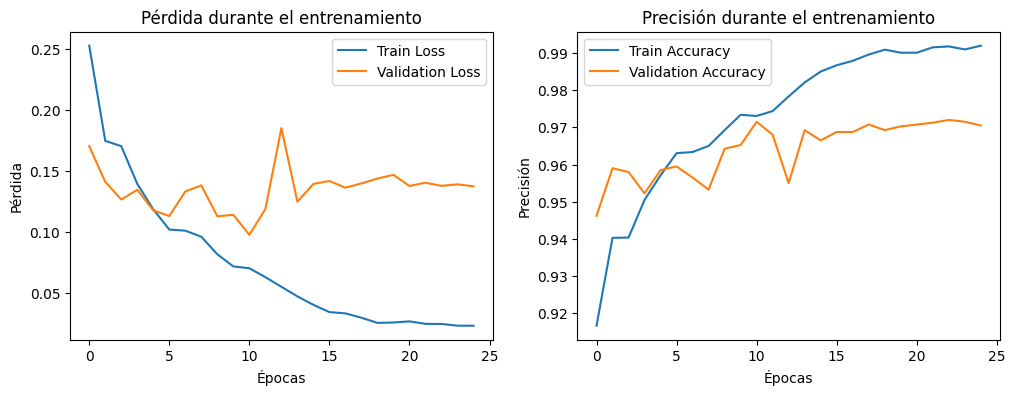

In [40]:
# Visualizar gráficos de pérdida y precisión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de pérdida
ax1.plot(history7.history['loss'], label='Train Loss')
ax1.plot(history7.history['val_loss'], label='Validation Loss')
ax1.set_title('Pérdida durante el entrenamiento')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Gráfico de precisión
ax2.plot(history7.history['accuracy'], label='Train Accuracy')
ax2.plot(history7.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Precisión durante el entrenamiento')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Precisión')
ax2.legend()

print(fig)

### Conversión y Guardado del mejor Modelo en TFLite

---
Exportamos el modelo a drive en un formato .tflite ya que este formato pesa menos, puesto que a la hora de subirlo al github solo se pueden subir archivos que pesen menos de 100MB

Hemos convertido el modelo Keras `best_model7` en un modelo compatible con TensorFlow Lite (TFLite) utilizando `tf.lite.TFLiteConverter.from_keras_model()`. Esto convierte el modelo Keras en un formato que puede ser utilizado por dispositivos con recursos limitados, como dispositivos móviles o sistemas integrados.

* **Convertir el modelo a TFLite**:
  * Utilizamos `from_keras_model()` del objeto `TFLiteConverter` para convertir el modelo Keras `best_model7` en un modelo compatible con TFLite. Esto encapsula el modelo y lo prepara para ser ejecutado en dispositivos con recursos limitados.

* **Guardar el modelo TFLite en un archivo**:
  * Después de la conversión, guardamos el modelo TFLite en un archivo utilizando un objeto de archivo en modo de escritura binaria (`'wb'`). Esto nos permite almacenar el modelo en el sistema de archivos local o en la nube para su posterior uso.

* **Ruta de Guardado**:
  * El modelo TFLite se guarda en la ruta especificada `'C:/Users/admin2/Desktop/dermascan_colabs/modelos/cancer_otros_best_model7.tflite'`.

In [42]:
# Convertir el modelo en un modelo compatible con TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(best_model7)
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open('C:/Users/admin2/Desktop/dermascan_colabs/modelos/cancer_otros_best_model7.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\admin2\AppData\Local\Temp\tmpchhwhpls\assets


INFO:tensorflow:Assets written to: C:\Users\admin2\AppData\Local\Temp\tmpchhwhpls\assets


### Muestra de predicción de imágenes

---

* Con el conjunto de imágenes de test vamos a sacar una muestra de la predicción que ha echo el modelo vs la imagen que es realmente.

In [44]:
validation_dat=(X_test, y_test_one_hot)
images_batch, labels_batch = validation_dat

len(images_batch)

4000

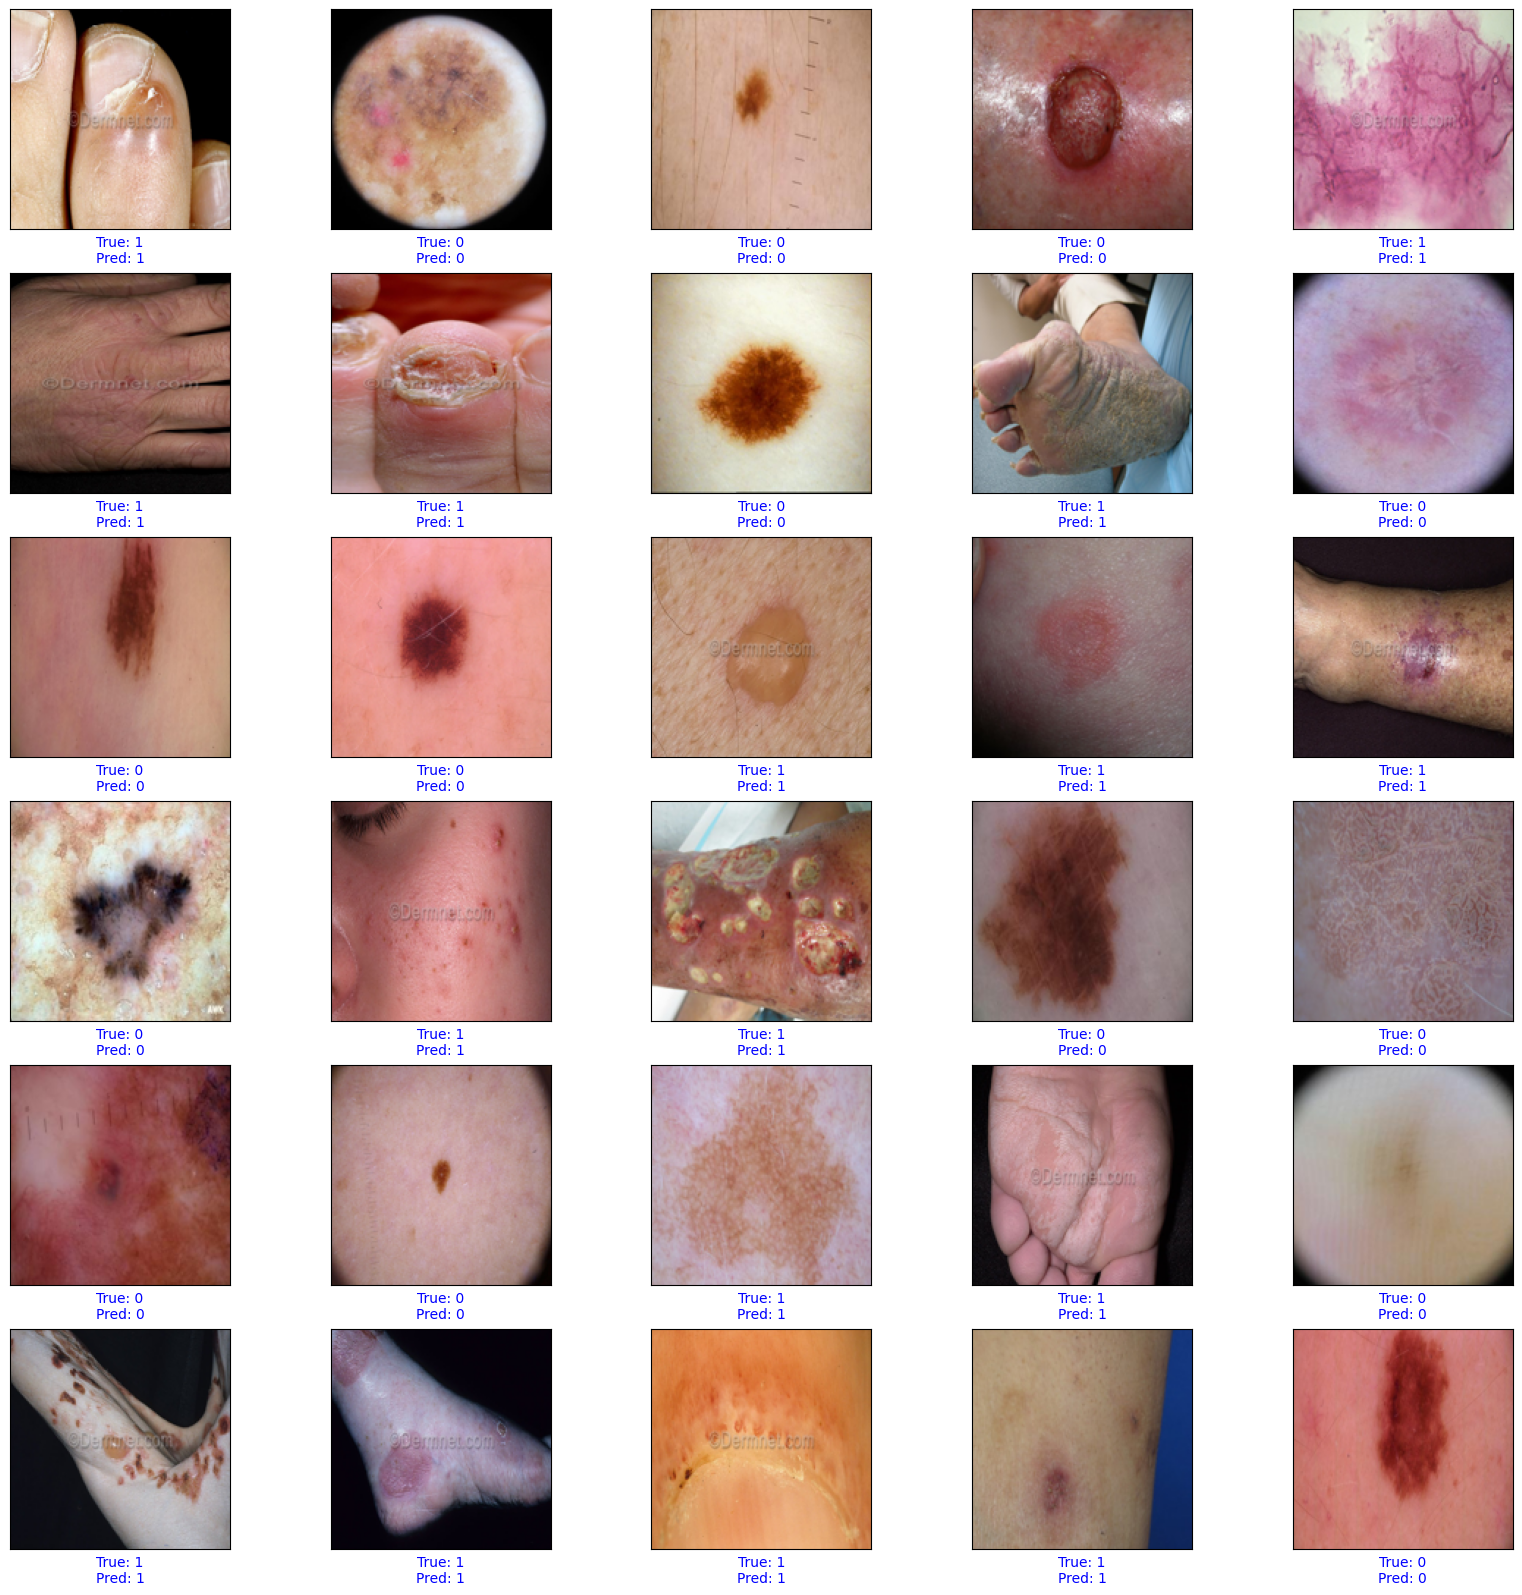

In [48]:
# Muestra los primeros 30 imágenes con la categoría real y el valor que predice el modelo
plt.figure(figsize=(20, 20))
for i in range(30):
    plt.subplot(6, 5, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    cmap_image = "binary" if predicted_labels[i] == y_pred2[i] else "Oranges"
    plt.imshow(images_batch[i], cmap=cmap_image)
    plt.xticks([])
    plt.yticks([])
    c = "blue" if predicted_labels[i] == y_pred2[i] else "red"
    plt.xlabel(f"True: {predicted_labels[i]}\nPred: {y_pred2[i]}", color=c)


plt.show()

### Predicciones erróneas

--- 

* Mostraremos algunos fallos que ha tenido el modelo

In [49]:
y_diff = np.equal(predicted_labels, y_pred2)
y_diff[y_diff==False].size
indices = np.where(y_diff == False)
indices = indices[0]

125/125 [==============================] - 2s 15ms/step


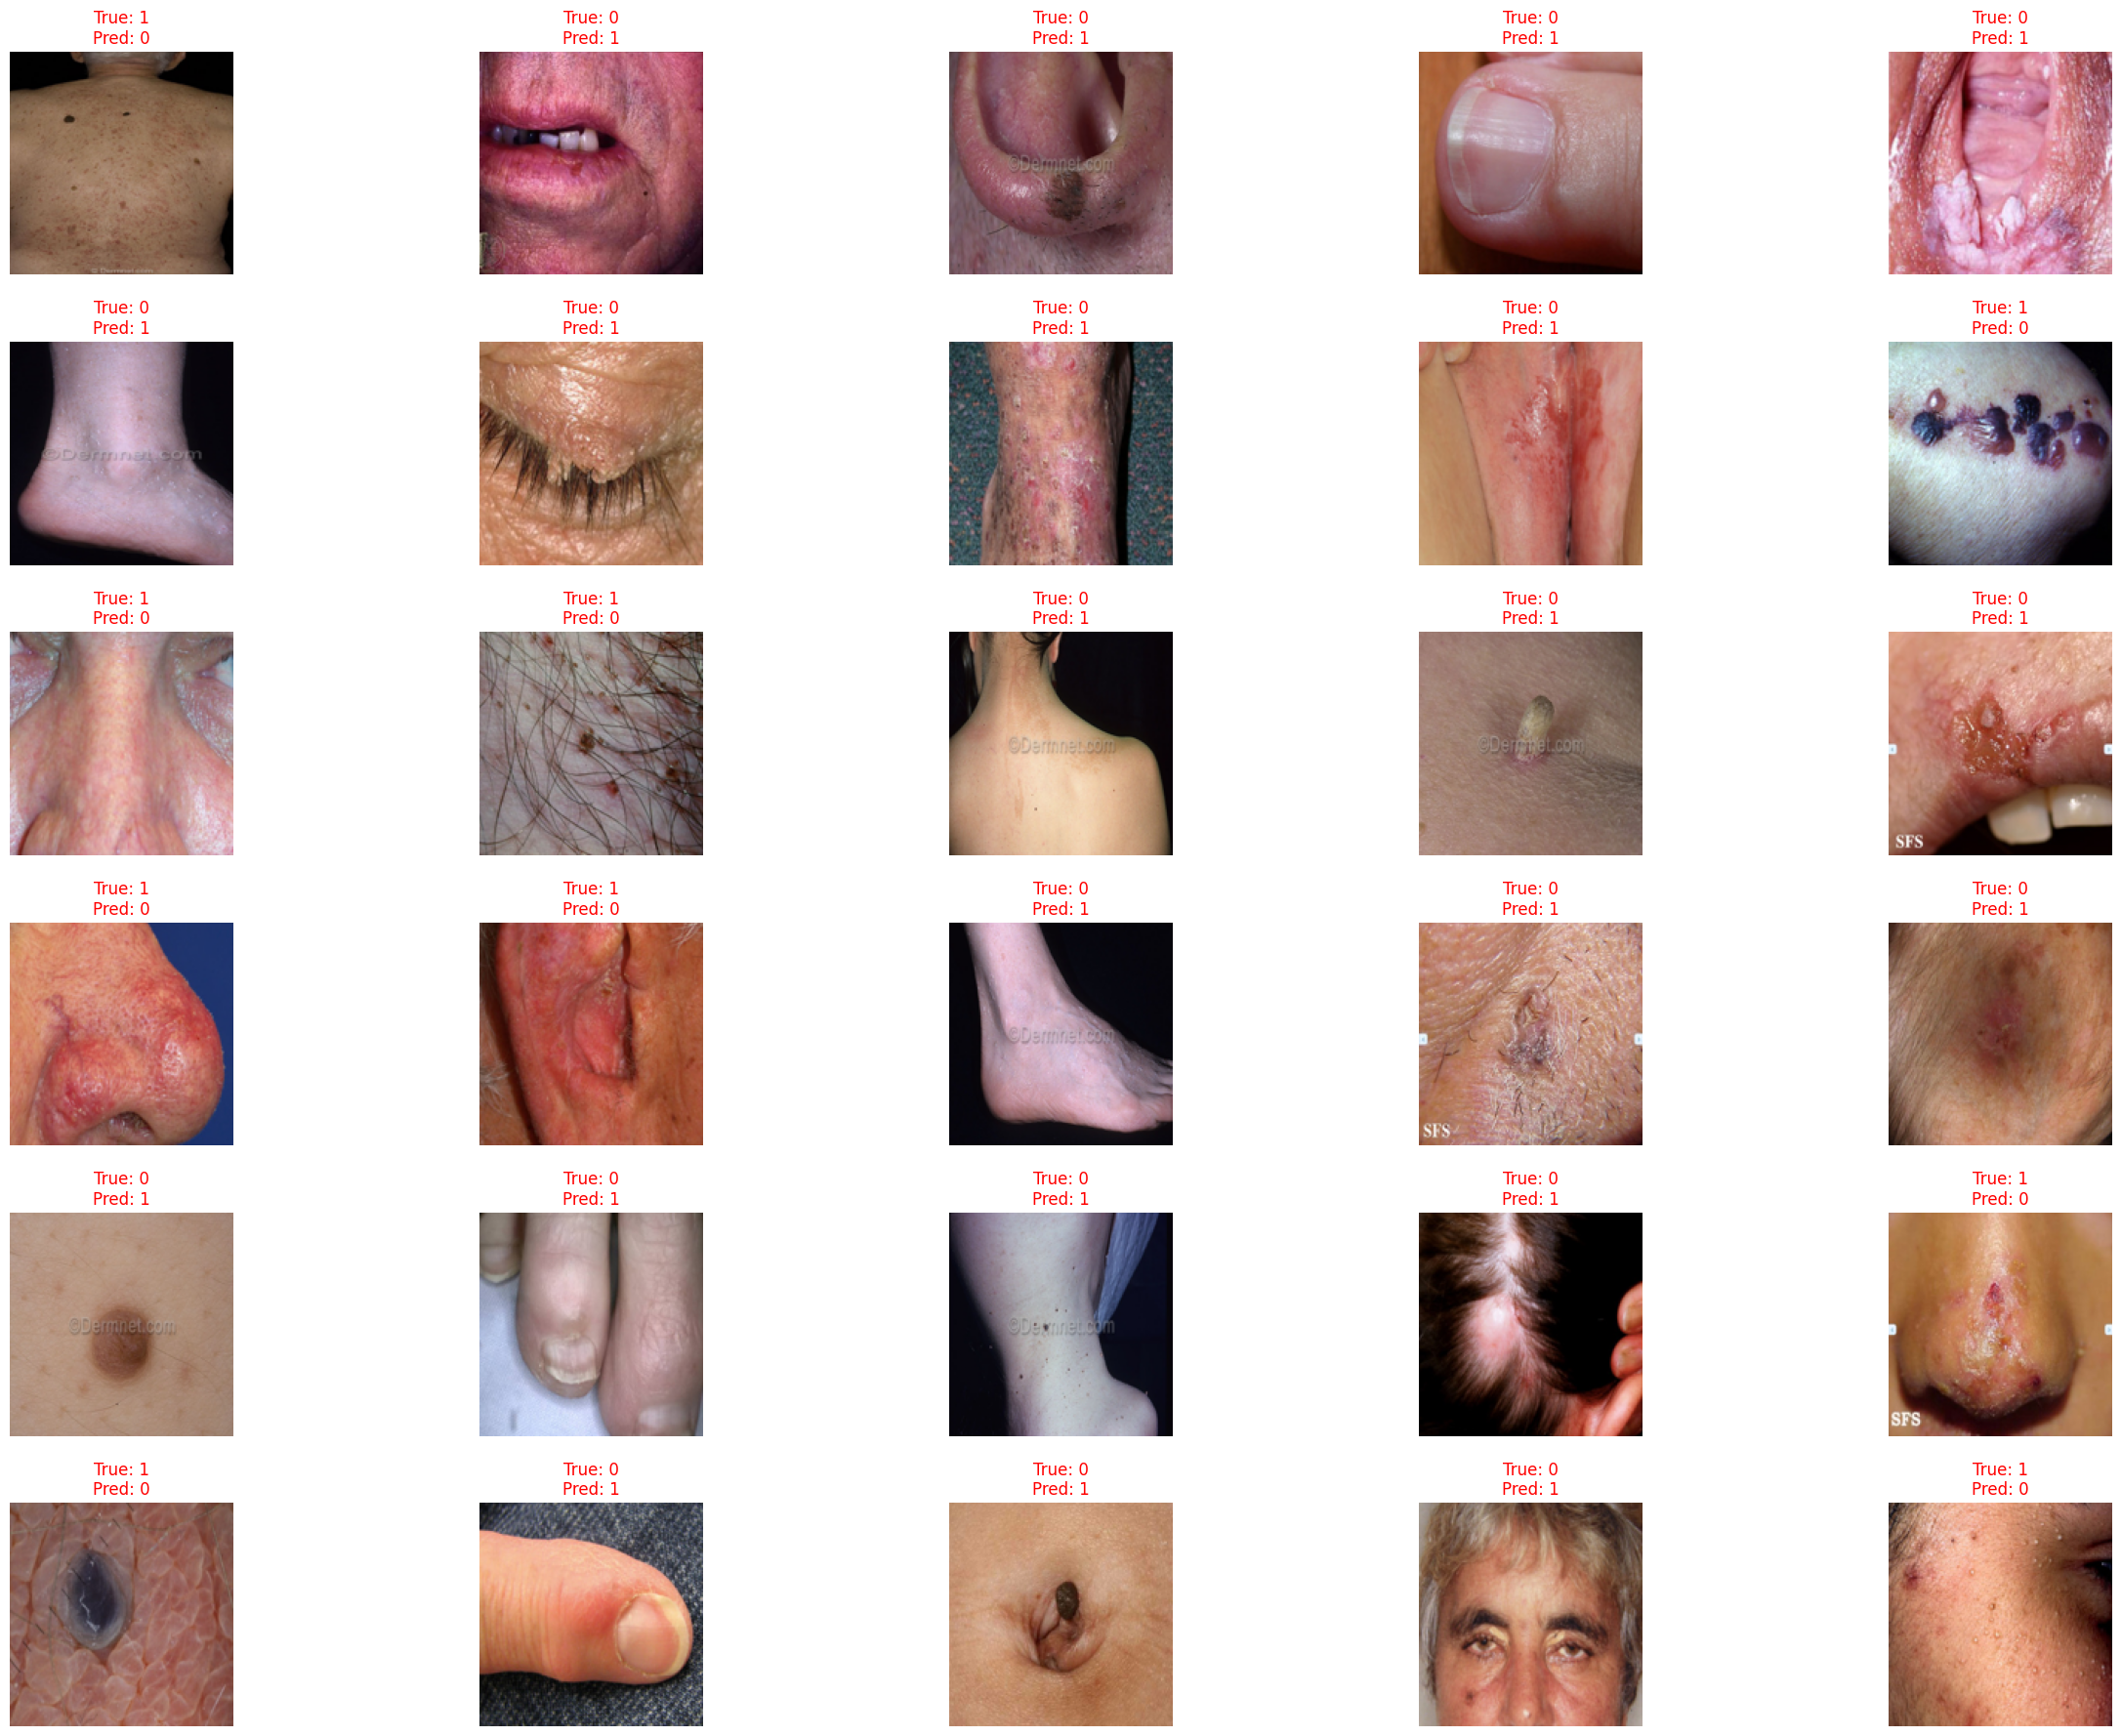

In [58]:
predictions = best_model7.predict(validation_dat[0])  # Predice utilizando solo las imágenes de validación
y_true = validation_dat[1].argmax(axis=1)  # Obtén las etiquetas verdaderas desde los datos de validación

y_pred = predictions.argmax(axis=1)
indices_mal_clasificadas = np.where(y_true != y_pred)[0]

total_imagenes = len(indices_mal_clasificadas)
filas = 8
columnas = 5

# Establecer el número máximo de imágenes a mostrar (30 o el total de imágenes mal clasificadas, el que sea menor)
max_imagenes_mostrar = min(30, total_imagenes)

plt.figure(figsize=(30, 30))
for i in range(max_imagenes_mostrar):
    imagen_mal_clasificada = validation_dat[0][indices_mal_clasificadas[i]]  # Accede a las imágenes mal clasificadas desde los datos de validación

    plt.subplot(filas, columnas, i + 1)  # Ajusta el número de filas y columnas según sea necesario
    plt.imshow(imagen_mal_clasificada, cmap="Oranges")
    plt.title(f"True: {y_true[indices_mal_clasificadas[i]]}\nPred: {y_pred[indices_mal_clasificadas[i]]}", color="red")
    plt.axis('off')

plt.subplots_adjust(hspace=0.3)
plt.show()

## Prueba de predicción

### Importamos el modelo

* Extraemos nuestro modelo entrenado

In [59]:
# Ruta al archivo .tflite
ruta_archivo = 'C:/Users/admin2/Desktop/dermascan_colabs/modelos/cancer_otros_best_model7.tflite'

# Carga el modelo
best_m7 = tf.lite.Interpreter(model_path=ruta_archivo)
best_m7.allocate_tensors()

### Prueba con imagen de cáncer de piel

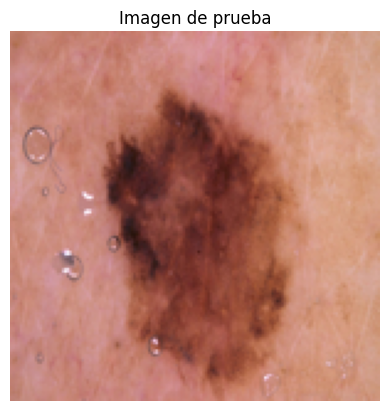

Probabilidad de clase cancer: 0.99999917
Probabilidad de clase otras_lesiones: 7.904383e-07
La imagen es cáncer de piel al 100.0%


In [63]:
# Cargar una imagen de prueba y redimensionarla al tamaño adecuado
imagen_prueba_path = 'C:/Users/admin2/Desktop/dermascan_colabs/imagenes_prueba/cancer2.jpg'
imagen_prueba = Image.open(imagen_prueba_path)
imagen_prueba = imagen_prueba.resize((150, 150))  # Redimensionar la imagen al tamaño adecuado

# Mostrar la imagen
plt.imshow(imagen_prueba)
plt.title('Imagen de prueba')
plt.axis('off')  # Desactivar los ejes
plt.show()

# Convertir la imagen a un array numpy y normalizar los valores de píxeles entre 0 y 1
imagen_array = np.array(imagen_prueba, dtype=np.float32) / 255.0

# Agregar una dimensión de lote
imagen_array = np.expand_dims(imagen_array, axis=0)

# Establecer los datos de entrada
input_details = best_m7.get_input_details()
best_m7.set_tensor(input_details[0]['index'], imagen_array)

# Realizar la predicción
best_m7.invoke()

# Obtener el resultado de la predicción
prediccion = best_m7.get_tensor(best_m7.get_output_details()[0]['index'])

# Imprimir la predicción
print("Probabilidad de clase cancer:", prediccion[0, 0])
print("Probabilidad de clase otras_lesiones:", prediccion[0, 1])

# Clasificación final basada en la probabilidad más alta
clase_predicha = np.argmax(prediccion)
if clase_predicha == 0:
    print(f"La imagen es cáncer de piel al {round(prediccion[0, 0] * 100, 2)}%")
else:
    print(f"La imagen es piel con otras lesiones al {round(prediccion[0, 1] * 100, 2)}%")

### Prueba con imagen de otras lesiones

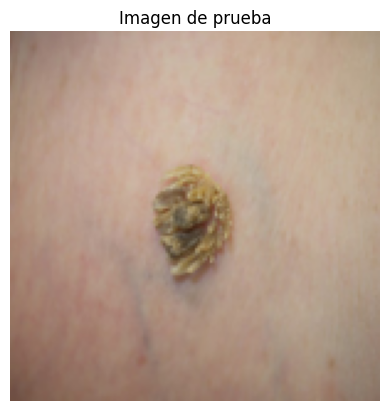

Probabilidad de clase cancer: 8.343492e-05
Probabilidad de clase otras_lesiones: 0.99991655
La imagen es piel con otras lesiones al 99.99%


In [64]:
# Cargar una imagen de prueba y redimensionarla al tamaño adecuado
imagen_prueba_path = 'C:/Users/admin2/Desktop/dermascan_colabs/imagenes_prueba/otras_lesiones1.jpg'
imagen_prueba = Image.open(imagen_prueba_path)
imagen_prueba = imagen_prueba.resize((150, 150))  # Redimensionar la imagen al tamaño adecuado

# Mostrar la imagen
plt.imshow(imagen_prueba)
plt.title('Imagen de prueba')
plt.axis('off')  # Desactivar los ejes
plt.show()

# Convertir la imagen a un array numpy y normalizar los valores de píxeles entre 0 y 1
imagen_array = np.array(imagen_prueba, dtype=np.float32) / 255.0

# Agregar una dimensión de lote
imagen_array = np.expand_dims(imagen_array, axis=0)

# Establecer los datos de entrada
input_details = best_m7.get_input_details()
best_m7.set_tensor(input_details[0]['index'], imagen_array)

# Realizar la predicción
best_m7.invoke()

# Obtener el resultado de la predicción
prediccion = best_m7.get_tensor(best_m7.get_output_details()[0]['index'])

# Imprimir la predicción
print("Probabilidad de clase cancer:", prediccion[0, 0])
print("Probabilidad de clase otras_lesiones:", prediccion[0, 1])

# Clasificación final basada en la probabilidad más alta
clase_predicha = np.argmax(prediccion)
if clase_predicha == 0:
    print(f"La imagen es cáncer de piel al {round(prediccion[0, 0] * 100, 2)}%")
else:
    print(f"La imagen es piel con otras lesiones al {round(prediccion[0, 1] * 100, 2)}%")

## Conclusión

---

* Hemos alcanzando un 97.20% de precisión de nuestro modelo en la clasificacion de imagenes en las categorias  *cancer* y *otras_lesiones*.

* Este alto porcentaje de acierto nos asegura que muestro modelo es fiable casi al 100% en el nivel de clasificación de nuestra aplicación.
* Esto quiere decir que puede diferenciar a la perfección una imagen de cáncer de piel de una imagen con otras lesiones cutáneas no cancerosas.